# UNIDADE 2: Tratamento dos dados

2.1. Análise exploratória de dados (EDA)</br>
2.2. Limpeza de dados</br>
2.3. Transformação de dados</br>
2.3.1. Divisão dos dados</br>
2.3.2. Balanceamento</br>
2.3.3. Escalonamento</br>
2.3.4. Codificação e criação de features</br>
2.4. Redução de dimensionalidade</br>



<div style="border: 2px solid #00008B; padding: 15px; border-radius: 10px; background-color: #00008B; color: #FFFFFF; font-family: Arial;">
  <h1 style="margin-top: 0;">Planejamento de Sucessão</h1>
  <p>Descrição: Identificar funcionários com potencial para ocupar cargos de liderança no futuro e planejar a sucessão de cargos críticos</p>
  <p>Dados sintéticos produzidos pelo ChatGPT, baseado no projeto Google Oxygen: Como a Google usou dados para ver se os gerentes fazem diferença?</p>

</div>


- https://www.linkedin.com/pulse/project-oxygen-8-conselhos-do-google-para-o-gerente-david/</br>
- https://www.feedz.com.br/blog/projeto-oxigenio-do-google</br>



<div style="background-color: #f0f8ff; padding: 20px; border-radius: 10px;">
  <ul>
    <li>Idade do funcionário (valores inteiros  de 18 a 75)</li>
    <li>Nível de educação (valores Superior, Médio, Doutorado, Especialização)</li>
    <li>Avaliação de desempenho (valores inteiros  entre 0 e 5)</li>
    <li>Experiência em cargos de liderança(valores 0 ou 1)</li>
    <li>Habilidades e competências (valores inteiros entre 0 a 10)</li>
    <li>Participação em treinamentos de liderança (valores S ou N)</li>
    <li>Feedback de supervisores (valores reais enter 0.0 e 1.0)</li>
    <li>Satisfação no trabalho (valores inteiros entre 0 e 5)</li>
    <li>É um bom coach (valores S ou N)</li>
    <li>Empodera a equipe e não faz microgestão (valores S ou N)</li> 
    <li>Exprime interesse e preocupação pelo sucesso e bem-estar pessoal dos membros da equipe (valores S ou N)</li>
    <li>É produtivo e orientado para os resultados (valores S ou N)</li>
    <li>É bom comunicador - escuta e compartilha informações (valores S ou N)</li>
    <li>Ajuda com desenvolvimento de carreira (valores S ou N)</li>
    <li>Tem uma visão clara e estratégia para a equipe (valores S ou N)</li>
    <li>Possui habilidades técnicas fundamentais que o ajudam a aconselhar a equipe (valores S ou N)</li>
    <li><b>Lider (valores S ou N)</b></li>
  </ul>
</div>


# Classificação Binária

A classificação em uma de duas classes é um problema comum em aprendizado de máquina. Você pode querer prever se um cliente provavelmente fará uma compra ou não, se uma transação de cartão de crédito foi fraudulenta ou não. Todos esses são problemas de classificação binária.

Nos seus dados brutos, as classes podem ser representadas por strings como "Sim" e "Não". Antes de usar esses dados, atribuiremos um rótulo de classe: uma classe será 0 e a outra será 1.

<div style="background-color: #f0f8ff; padding: 20px; border-radius: 10px;">
  <h3>Fluxo no Pipeline</h3>
  <ul>
    <li><b>Ingestão de Dados</b>: Coleta e armazenamento de dados brutos.</li>
    <li><b>Análise Exploratória</b>: Utilização dos dados para EDA.</li>
    <li><b>Pré-processamento</b>: Limpeza e transformação dos dados.</li>
    <li><b>Normalização e Engenharia de Features</b>: Criação de datasets normalizados e finalizados para treinamento.</li>
    <li><b><span style="color:red">Treinamento de Modelos</b>: Utilização dos dados de treinamento e validação para treinar e validar modelos.</span></li>
    <li><b>Implantação de Modelos</b>: Armazenamento dos modelos treinados em um Model Registry.</li>
    <li><b>Inferência</b>: Utilização de dados de inferência para obter predições dos modelos em produção.</li>
  </ul>

Considerações de MLOps

  <ul>
    <li><b>Versionamento</b>: Versionar tanto os dados quanto os modelos para garantir a reprodutibilidade.</li>
    <li><b>Monitoramento</b>: Implementar monitoramento contínuo dos modelos em produção para detectar drifts de desempenho.</li>
    <li><b>Automatização</b>: Automatizar o pipeline de dados e modelos utilizando ferramentas de CI/CD.</li>
    <li><b>Segurança</b>: Garantir a segurança e conformidade dos dados, especialmente se envolver dados sensíveis.</li>
  </ul>

</div>



In [1]:
!pip install imbalanced-learn

  Using cached imbalanced_learn-0.12.3-py3-none-any.whl.metadata (8.3 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
Using cached imbalanced_learn-0.12.3-py3-none-any.whl (258 kB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.1
    Uninstalling joblib-1.1.1:
      Successfully uninstalled joblib-1.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.4.2 which is incompatible.
pandas-profiling 3.2.0 requires visions[type_image_path]==0.7.4, but you have visions 0.7.6 which is incompatible.


In [2]:
import pandas as pd

from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

import joblib

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df_normalizado = pd.read_csv("../data/processed/sucessao_normalizado.csv")
df_servidor = pd.read_csv("../data/interim/sucessao_processado.csv")

<div style="background-color: #f0f8ff; padding: 20px; border-radius: 10px;">
<h3> Divisão em treino e teste</h3>

Em aprendizado de máquina, é fundamental dividir o conjunto de dados em partes de treino e teste para avaliar de forma eficaz o desempenho de um modelo.

1. <b>Avaliação do Desempenho</b>
Dividir os dados em treino e teste permite uma avaliação objetiva do modelo. O conjunto de treino é utilizado para ajustar o modelo, enquanto o conjunto de teste, que o modelo não viu durante o treinamento, serve para avaliar a capacidade de generalização do modelo. 

2. <b>Prevenção do Overfitting</b>
O overfitting ocorre quando um modelo se ajusta excessivamente aos dados de treinamento, capturando ruídos e padrões específicos dos dados de treino que não se generalizam para novos dados. Dividir os dados em treino e teste ajuda a identificar e mitigar o overfitting, pois um modelo que se sai bem no conjunto de treino, mas mal no conjunto de teste, é provavelmente um modelo superajustado.

3. <b>Estimativa Realista de Desempenho</b>
Treinar e testar o modelo nos mesmos dados pode levar a uma estimativa irrealisticamente alta de desempenho, pois o modelo pode simplesmente memorizar os dados de treino. Ao separar um conjunto de teste, obtemos uma estimativa mais realista de como o modelo se comportará em situações do mundo real, onde ele encontrará dados não vistos.

4. <b>Ajuste de Hiperparâmetros</b>
A divisão entre treino e teste é também útil para ajustar os hiperparâmetros do modelo. Os hiperparâmetros são parâmetros que não são aprendidos pelo modelo durante o treinamento e precisam ser definidos antes do treinamento. Utilizando uma parte dos dados para validação (um conjunto separado ou através de validação cruzada), podemos ajustar esses hiperparâmetros para otimizar o desempenho do modelo no conjunto de teste.

5. <b>Garantia de Robustez</b>
Testar o modelo em dados não vistos fornece uma medida de robustez do modelo. Um modelo robusto é aquele que mantém seu desempenho mesmo quando exposto a diferentes conjuntos de dados. Dividir os dados ajuda a garantir que o modelo seja robusto e possa generalizar bem para novos dados.
</div>

In [5]:
X = df_normalizado.loc[:, df_normalizado.columns != 'Lider']
y = df_normalizado["Lider"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
###X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42, stratify=y)

In [6]:
X_train.to_csv('../data/train/X_train.csv', index=False)
X_test.to_csv('../data/train/X_test.csv', index=False)

y_train.to_csv('../data/train/y_train.csv', index=False)
y_test.to_csv('../data/train/y_test.csv', index=False)

<div style="background-color: #ffcccc; padding: 20px; border-radius: 10px;">
<h3>Desbalanceamento de dados</h3>

Treinar um modelo de classificação com variáveis desbalanceadas pode resultar em problemas, pois a classe dominante tende a se sobressair, dificultando a previsão da classe minoritária. Datasets onde mais de 50% das entradas pertencem a uma única classe são considerados desbalanceados. Isso afeta o desempenho dos algoritmos de aprendizado de máquina, que preferem dados equilibrados para otimizar a precisão. Em dados desbalanceados, os algoritmos tendem a favorecer a classe majoritária, resultando em classificações incorretas da classe minoritária.

Neste processo, tanto X_train quanto y_train são ajustados de forma que a quantidade de exemplos em cada classe da variável alvo (y_train) seja equilibrada, e as respectivas características (X_train) sejam mantidas.

</div>

In [7]:
count1 = X_train["Experiencia_cargos_lideranca"].value_counts().reset_index()
count1.columns = ['Experiencia_cargos_lideranca', 'Contagem']

count2 = y_train.value_counts().reset_index()
count2.columns = ['Lider', 'Contagem']

In [8]:
count1

,Experiencia_cargos_lideranca,Contagem
0,0.0,2386
1,1.0,906


In [9]:
count2

,Lider,Contagem
0,0,2999
1,1,293


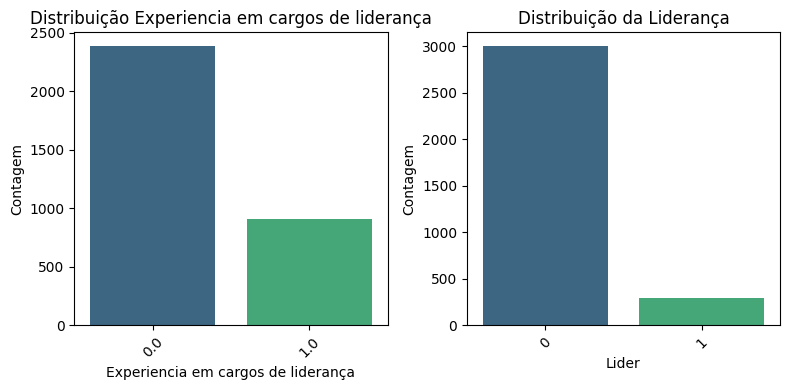

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
sns.barplot(data=count1, x='Experiencia_cargos_lideranca', y='Contagem', palette='viridis', ax=axes[0])
axes[0].set_title('Distribuição Experiencia em cargos de liderança')
axes[0].set_xlabel('Experiencia em cargos de liderança')
axes[0].set_ylabel('Contagem')
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(data=count2, x='Lider', y='Contagem', palette='viridis', ax=axes[1])
axes[1].set_title('Distribuição da Liderança')
axes[1].set_xlabel('Lider')
axes[1].set_ylabel('Contagem')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

<div style="background-color: #ffcccc; padding: 20px; border-radius: 10px;">
<b>Undersampling</b> envolve <b>reduzir a quantidade de dados da classe majoritária</b> para igualar a classe minoritária, equilibrando as observações.
</div>

In [11]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy = 'majority')
X_resampled_under, y_resampled_under = rus.fit_resample(X_train, y_train)

In [12]:
count1 = X_resampled_under["Experiencia_cargos_lideranca"].value_counts().reset_index()
count1.columns = ['Experiencia_cargos_lideranca', 'Contagem']

count2 = y_resampled_under.value_counts().reset_index()
count2.columns = ['Lider', 'Contagem']


In [13]:
# Ajuste das FEATURES para equilibrar a TARGET
count1

,Experiencia_cargos_lideranca,Contagem
0,0.0,432
1,1.0,154


In [14]:
# A variável TARGET fica equilibrada
count2

,Lider,Contagem
0,0,293
1,1,293


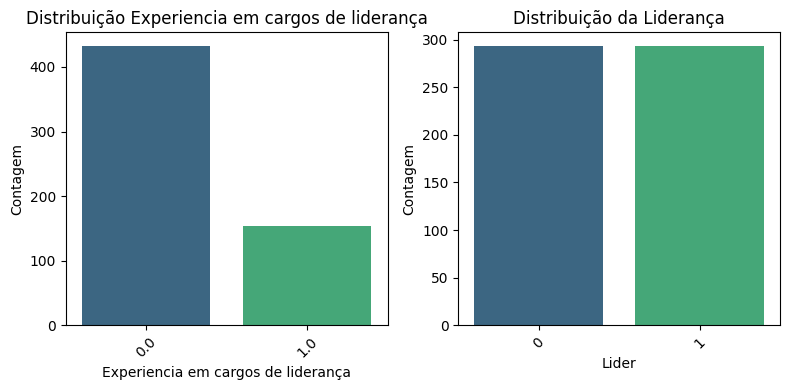

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
sns.barplot(data=count1, x='Experiencia_cargos_lideranca', y='Contagem', palette='viridis', ax=axes[0])
axes[0].set_title('Distribuição Experiencia em cargos de liderança')
axes[0].set_xlabel('Experiencia em cargos de liderança')
axes[0].set_ylabel('Contagem')
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(data=count2, x='Lider', y='Contagem', palette='viridis', ax=axes[1])
axes[1].set_title('Distribuição da Liderança')
axes[1].set_xlabel('Lider')
axes[1].set_ylabel('Contagem')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

<div style="background-color: #ffcccc; padding: 20px; border-radius: 10px;">
<b>Oversampling</b> <b>aumenta a quantidade de registros da classe minoritária</b>, podendo duplicar registros aleatoriamente, embora isso possa gerar muitas informações idênticas. Para evitar duplicações, pode-se usar a técnica SMOTE, que cria novos dados sintéticos semelhantes aos dados reais, mas não idênticos. O SMOTE é projetado para gerar novos exemplos sintéticos interpolando entre os existentes, o que pode resultar em valores contínuos. </div>

In [16]:
# importar as bibliotecas necessárias
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_resampled_Over, y_resampled_Over = smote.fit_resample(X_train, y_train)

In [17]:
count1 = X_resampled_Over["Experiencia_cargos_lideranca"].value_counts().reset_index()
count1.columns = ['Experiencia_cargos_lideranca', 'Contagem']

count2 = y_resampled_Over.value_counts().reset_index()
count2.columns = ['Lider', 'Contagem']

In [18]:
count1

,Experiencia_cargos_lideranca,Contagem
0,0.000000,4367
1,1.000000,1605
2,0.054184,1
3,0.094208,1
4,0.030850,1
5,0.145343,1
6,0.666276,1
7,0.773946,1
8,0.772677,1
9,0.553674,1


In [19]:
count2

,Lider,Contagem
0,0,2999
1,1,2999


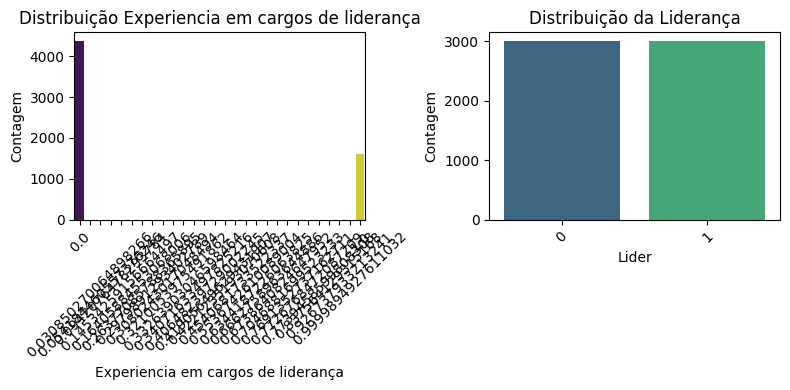

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
sns.barplot(data=count1, x='Experiencia_cargos_lideranca', y='Contagem', palette='viridis', ax=axes[0])
axes[0].set_title('Distribuição Experiencia em cargos de liderança')
axes[0].set_xlabel('Experiencia em cargos de liderança')
axes[0].set_ylabel('Contagem')
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(data=count2, x='Lider', y='Contagem', palette='viridis', ax=axes[1])
axes[1].set_title('Distribuição da Liderança')
axes[1].set_xlabel('Lider')
axes[1].set_ylabel('Contagem')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

<div style="background-color: #ffcccc; padding: 20px; border-radius: 10px;">
Para <b>variáveis binárias</b>, é mais adequado usar <b>outras técnicas de oversampling</b>, como a duplicação aleatória de amostras da classe minoritária.
</div>

In [21]:
from sklearn.utils import resample

data = pd.concat([X_train, y_train], axis=1)

# Separar as classes majoritária e minoritária
majority_class = data[data[y_train.name] == 0]
minority_class = data[data[y_train.name] == 1]

# Oversample da classe minoritária
minority_oversampled = resample(minority_class, 
                                replace=True,  
                                n_samples=len(majority_class),
                                random_state=42)   

# Combinar as classes majoritária e minoritária reamostrada
data_resampled = pd.concat([majority_class, minority_oversampled])

X_resampled_Over = data_resampled.drop(columns=[y_train.name])
y_resampled_Over = data_resampled[y_train.name]

In [22]:
X_resampled_Over["Experiencia_cargos_lideranca"].value_counts()

Experiencia_cargos_lideranca
0.0    4383
1.0    1615
Name: count, dtype: int64

In [23]:
y_resampled_Over.value_counts()

Lider
0    2999
1    2999
Name: count, dtype: int64

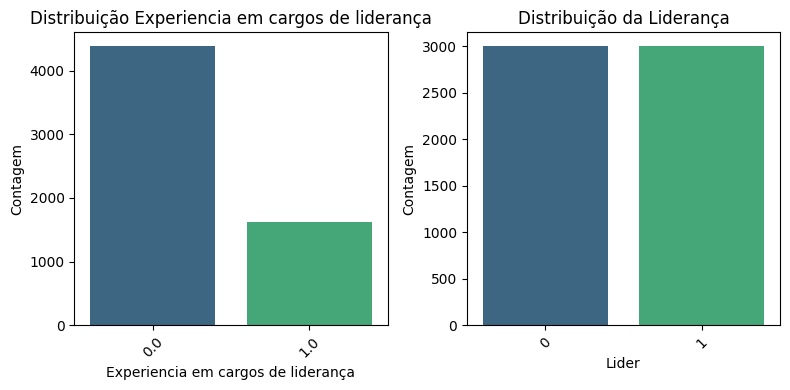

In [24]:
count1 = X_resampled_Over["Experiencia_cargos_lideranca"].value_counts().reset_index()
count1.columns = ['Experiencia_cargos_lideranca', 'Contagem']

count2 = y_resampled_Over.value_counts().reset_index()
count2.columns = ['Lider', 'Contagem']

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
sns.barplot(data=count1, x='Experiencia_cargos_lideranca', y='Contagem', palette='viridis', ax=axes[0])
axes[0].set_title('Distribuição Experiencia em cargos de liderança')
axes[0].set_xlabel('Experiencia em cargos de liderança')
axes[0].set_ylabel('Contagem')
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(data=count2, x='Lider', y='Contagem', palette='viridis', ax=axes[1])
axes[1].set_title('Distribuição da Liderança')
axes[1].set_xlabel('Lider')
axes[1].set_ylabel('Contagem')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

<div style="background-color: #f0f8ff; padding: 20px; border-radius: 10px;">
<h3>A Função Pipeline</h3>
A função Pipeline do módulo sklearn.pipeline no Python é usada para montar uma sequência de transformações e um estimador final em um único objeto. Essa abordagem é útil para garantir que as transformações necessárias nos dados sejam aplicadas de forma consistente antes do treinamento do modelo, bem como durante a previsão. Além disso, a Pipeline facilita o uso de técnicas de validação cruzada e a otimização de hiperparâmetros. para node hiperparâmetros.</br></br>

<b>Crie as etapas a serem executadas, crie a pipeline e execute</b></br>
steps = [('scale', StandardScaler()), ('LR', LinearRegression())]</br>
pipe = Pipeline(steps)</br>
pipe.fit(X,y)</br>
  
</div>.

In [25]:
pipeline_lr=Pipeline([('model_lr',LogisticRegression(random_state=42))])
pipeline_dt=Pipeline([('model_dt',DecisionTreeClassifier(random_state=42))])
pipeline_rf=Pipeline([('model_rf',RandomForestClassifier())])

pipelines = [pipeline_lr, pipeline_dt, pipeline_rf]
pipelines_dict = {0: 'LogisticRegression', 1: 'DecisionTree', 2: 'RandomForest'}

In [26]:
for pipe in pipelines:
    pipe.fit(X_train, y_train)
    
accuracy = []
for i, model in enumerate(pipelines):
    scores = cross_val_score(model, X_train,y_train, cv=10)
    accuracy.append(scores)
    print("%s: %f " % (pipelines_dict[i], scores.mean()))


LogisticRegression: 0.999088 
DecisionTree: 0.996962 
RandomForest: 0.999696 


In [27]:
import joblib
joblib.dump(pipelines[2], f'../models/model.joblib')

['../models/model.joblib']

In [28]:
!streamlit run ../app_model.py


  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8502
  Network URL: http://192.168.0.108:8502

^C
  Stopping...


<div style="background-color: #ff87b2; padding: 20px; border-radius: 10px;">
<h3>Atividade 2:</h3>

Para o estudo de caso do Planejamento de Sucessão cujo objetivo é identificar funcionários com potencial para ocupar cargos de liderança no futuro e planejar a sucessão de cargos críticos. Atualize o código feito em sala:

<ul>
    <li> Execute a Pipeline sem usar os dados normalizados. Avalie o resultado de acurácia</li>
    <li> Usando os dados normalizados teste o desbalanceamento de dados usando Undersampling e Oversampling. Execute a Pipeline e avalie o resultado de acurácia</li>
        
</ul>

Poste no AVA o Jupyter Notebook ou o link para o repositório GitHub
  
</div>.



In [29]:
X = df_servidor.loc[:, df_servidor.columns != 'Lider']
y = df_servidor["Lider"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [30]:
for pipe in pipelines:
    pipe.fit(X_train, y_train)

accuracy = []
for i, model in enumerate(pipelines):
    scores = cross_val_score(model, X_train,y_train, cv=10)
    accuracy.append(scores)
    print("%s: %f " % (pipelines_dict[i], scores.mean()))

LogisticRegression: 0.999696 
DecisionTree: 0.996962 
RandomForest: 0.999696 


In [31]:
for pipe in pipelines:
    pipe.fit(X_resampled_under, y_resampled_under)

accuracy = []
for i, model in enumerate(pipelines):
    scores = cross_val_score(model, X_resampled_under,y_resampled_under, cv=10)
    accuracy.append(scores)
    print("%s: %f " % (pipelines_dict[i], scores.mean()))


LogisticRegression: 0.998276 
DecisionTree: 0.989743 
RandomForest: 0.998276 


In [32]:
for pipe in pipelines:
    pipe.fit(X_resampled_Over, y_resampled_Over)
    
accuracy = []
for i, model in enumerate(pipelines):
    scores = cross_val_score(model, X_resampled_Over,y_resampled_Over, cv=10)
    accuracy.append(scores)
    print("%s: %f " % (pipelines_dict[i], scores.mean()))


LogisticRegression: 0.999333 
DecisionTree: 0.999333 
RandomForest: 0.999667 
